# <u>27/04/2021  to 02/05/2021 work</u>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### <u>Data Collection and Preperation</u>
**guys here we can understand how to combine multiple data_sets from a folder kindly go through this guys**

In [ ]:
# files=os.listdir(r'E:\solar_radiation_data')
# files

In [ ]:
# path=r'E:\solar_radiation_data'

# #blank dataframe
# final=pd.DataFrame()

# for file in files:
#     df=pd.read_csv(path+"/"+file,encoding='utf-8')
#     final=pd.concat([df,final])

In [2]:
final = pd.read_csv("combined_data_from_2016_2019_with_out_extra_features.csv")

In [3]:
final.head(n=-5)

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,1,2.2,177.77,0,0.17,1.1,1.2,167,40.16,15.7,974
1,2016,1,1,1,0,0,0,1,2.5,163.98,0,0.17,1.2,1.2,179,43.10,15.0,974
2,2016,1,1,2,0,0,0,1,2.8,150.22,0,0.17,1.2,1.2,188,44.81,14.7,974
3,2016,1,1,3,0,0,0,1,3.1,136.54,0,0.17,1.2,1.2,197,46.20,14.5,974
4,2016,1,1,4,0,0,0,1,3.3,122.99,0,0.17,1.2,1.2,201,48.00,14.2,974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52430,2019,12,29,19,0,0,0,4,-6.6,118.54,0,0.17,0.3,1.2,245,44.57,4.4,946
52431,2019,12,29,19,30,0,0,4,-6.6,124.54,0,0.17,0.3,1.2,278,45.20,4.2,946
52432,2019,12,29,20,0,0,0,4,-6.8,130.58,0,0.17,0.4,1.2,310,45.13,4.0,945
52433,2019,12,29,20,30,0,0,7,-6.8,136.63,0,0.17,0.4,1.2,327,45.81,3.8,946


In [4]:
final.shape

(52440, 18)

In [5]:
final.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
GHI                   0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Fill Flag             0
Surface Albedo        0
Wind Speed            0
Precipitable Water    0
Wind Direction        0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

### <u>Correlation Analysis</u>

In [6]:
final.corr()['GHI']

Year                  0.006134
Month                -0.040342
Day                   0.006559
Hour                 -0.005058
Minute               -0.001719
GHI                   1.000000
Clearsky GHI          0.953520
Cloud Type           -0.133795
Dew Point            -0.020667
Solar Zenith Angle   -0.840641
Fill Flag            -0.010224
Surface Albedo        0.026738
Wind Speed            0.384547
Precipitable Water    0.004510
Wind Direction       -0.092569
Relative Humidity    -0.381135
Temperature           0.521224
Pressure             -0.029899
Name: GHI, dtype: float64

**since it is observed that "GHi=clearsky Ghi" we can remove clearsky Ghi**
**we can also find that "fill flag","precipitable water" and "pressure" has very Low impact on GHI so there is no 
use of considering those columns**
**<u>so by this correlation analysis I am going to elimanate "clearsky GHI","fill flag","precipitable water" and "pressure" columns from our Data</u>**


In [7]:
# let's rename our data to df from final to make it easy for analysis 
df = final.drop([ "Clearsky GHI","Fill Flag"], axis = 1)
df.head()

,Year,Month,Day,Hour,Minute,GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,1,2.2,177.77,0.17,1.1,1.2,167,40.16,15.7,974
1,2016,1,1,1,0,0,1,2.5,163.98,0.17,1.2,1.2,179,43.10,15.0,974
2,2016,1,1,2,0,0,1,2.8,150.22,0.17,1.2,1.2,188,44.81,14.7,974
3,2016,1,1,3,0,0,1,3.1,136.54,0.17,1.2,1.2,197,46.20,14.5,974
4,2016,1,1,4,0,0,1,3.3,122.99,0.17,1.2,1.2,201,48.00,14.2,974


In [8]:
features = df.columns
for feature in features:
    if (len(df[feature].unique())<50):
        print('for {}:{}'.format(feature,df[feature].unique()))

for Year:[2016 2017 2018 2019]
for Month:[ 1  2  3  4  5  6  7  8  9 10 11 12]
for Day:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
for Hour:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
for Minute:[ 0 30]
for Cloud Type:[1 0 3 7 4 8 9 6 2]
for Surface Albedo:[0.17 0.15 0.16 0.18 0.19 0.2  0.21 0.22 0.87]


**from above Observation we can conclude other than date&time columns on cloud type contains no continuous values, rest of all other features contains Continuous features**

## <u>Univariate Analysis</u>

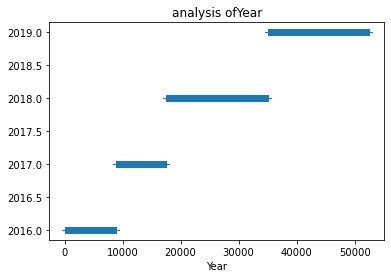

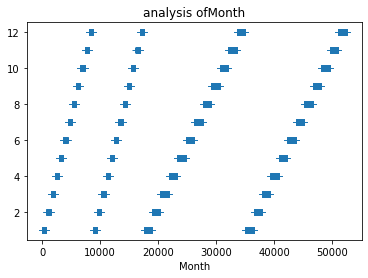

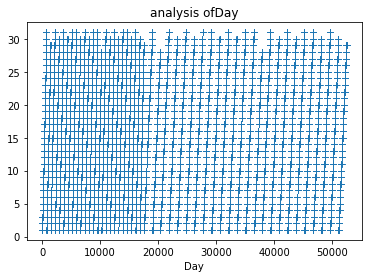

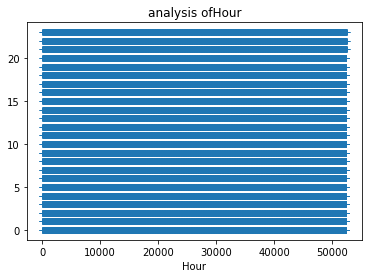

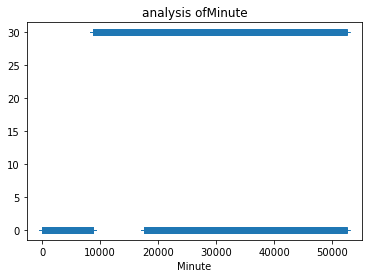

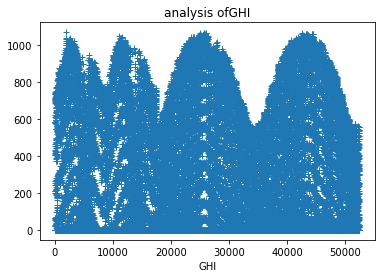

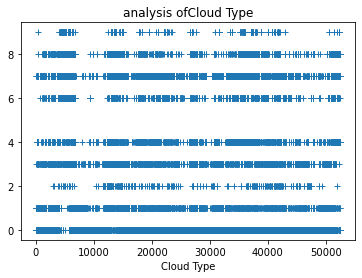

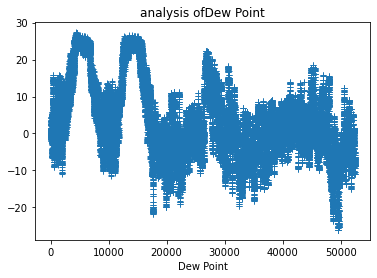

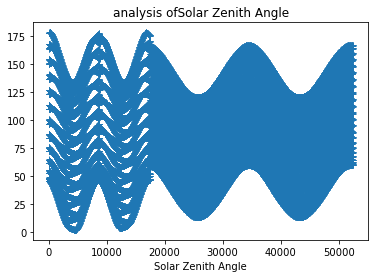

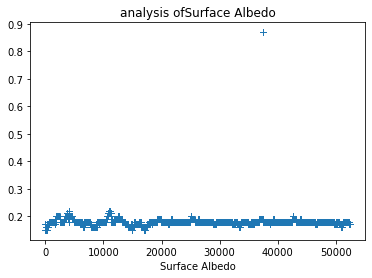

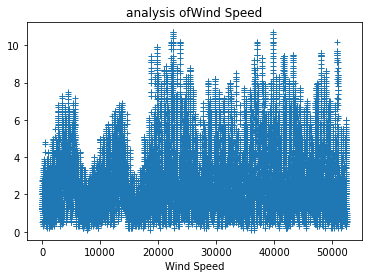

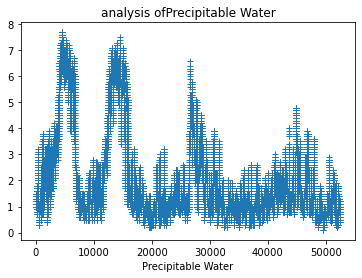

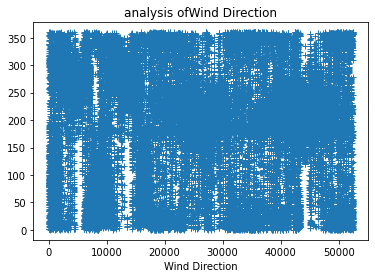

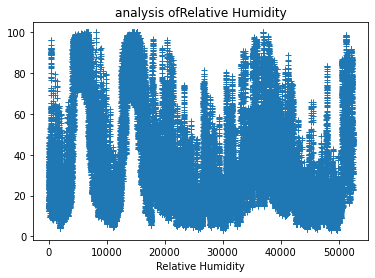

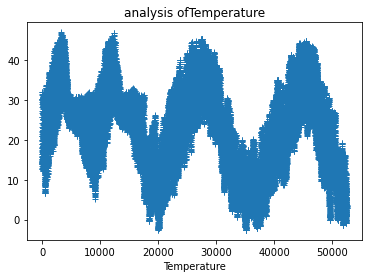

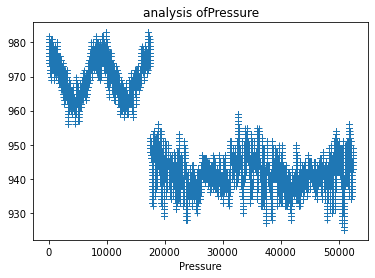

In [9]:
for feature in features:
    plt.plot(df[feature], '+')
    plt.xlabel(feature)
    plt.title('analysis of'+feature)
    plt.show()

## <u>Bivariate Analysis</u>

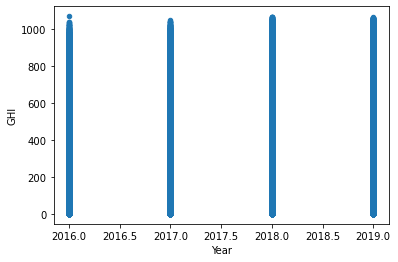

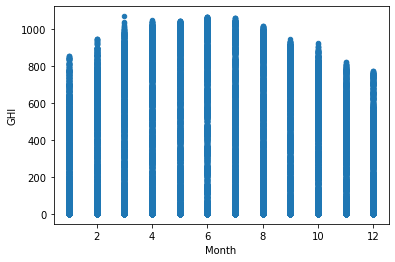

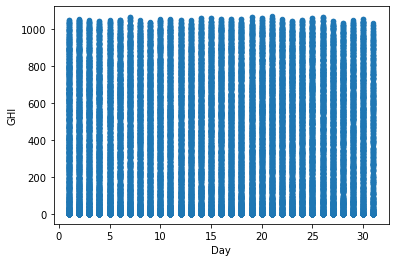

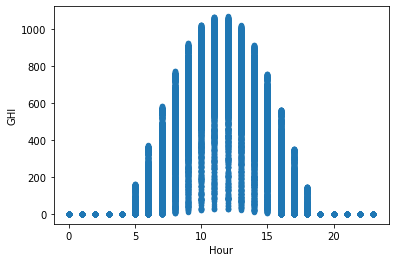

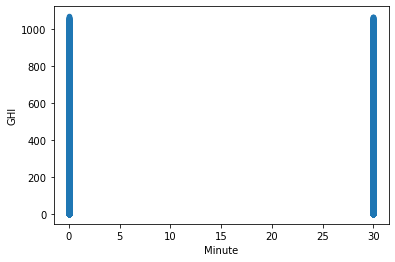

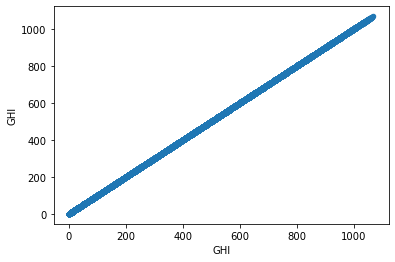

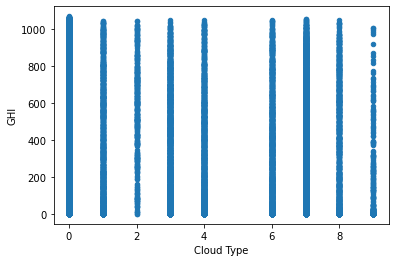

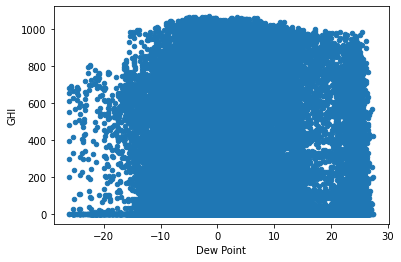

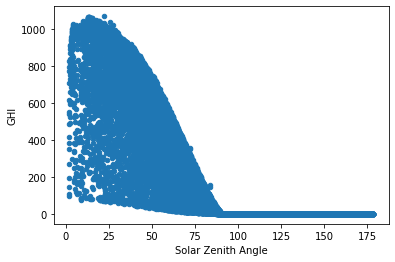

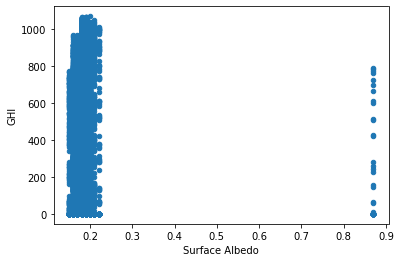

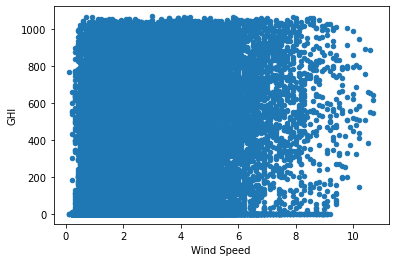

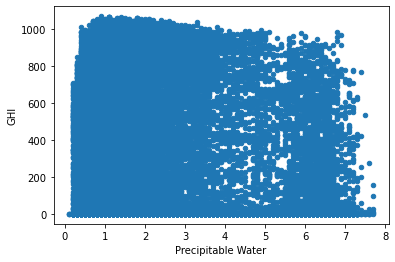

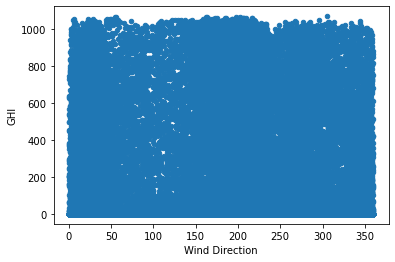

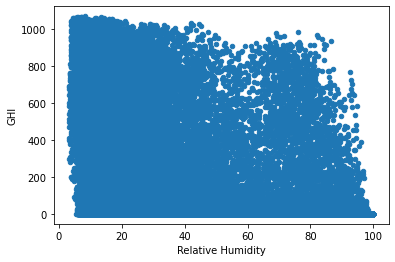

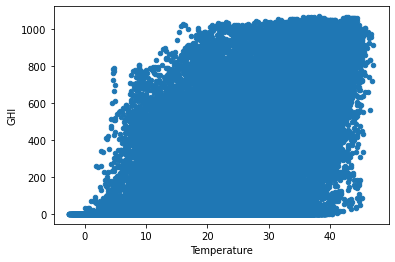

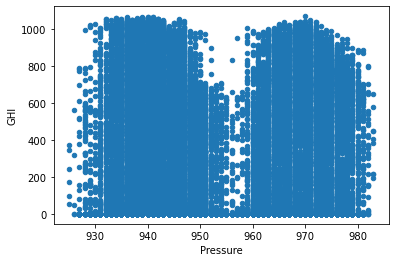

In [10]:
for feature in features:
    df.plot(kind='scatter', x=feature, y='GHI')
    plt.show()

**1. we can observe GHI increases between 6 to 18 hours from hour and GHI plot
  2. we can observe at cloud_type 5,9 there is no impact on GHI
  3. we can also observe increasing Solar_Zenith_angle Decreases GHI
  4. and can say increasing temperature can increase GHI
  
***<u>this is the observation from bivariate analysis between features and "GHI"</u>***

****for <u>"relative Humidity,wind direction,wind speed and dew point"</u> we can't find any relation from this analysis let's try with another****
  

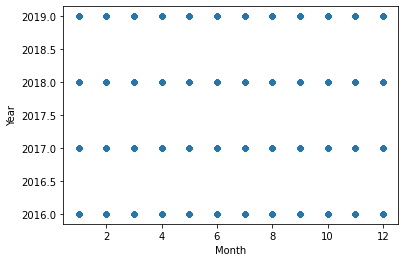

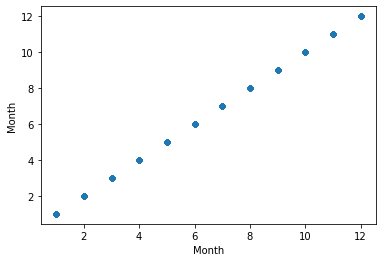

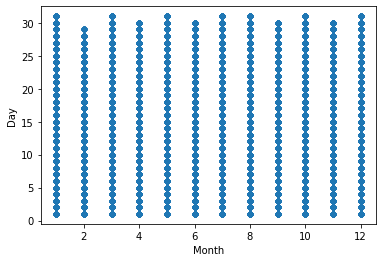

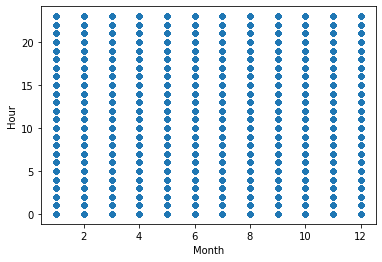

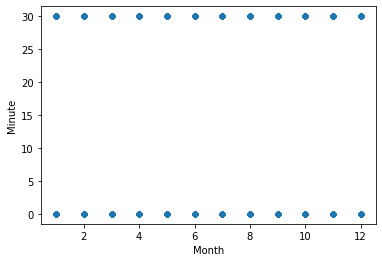

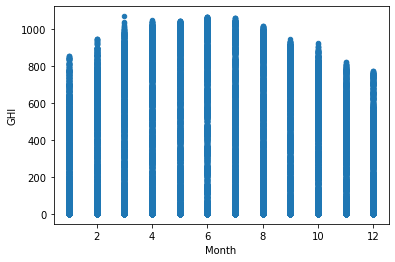

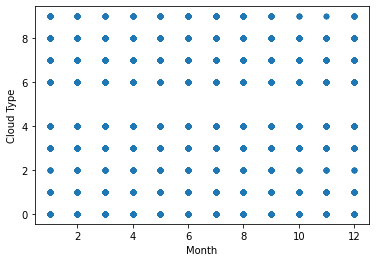

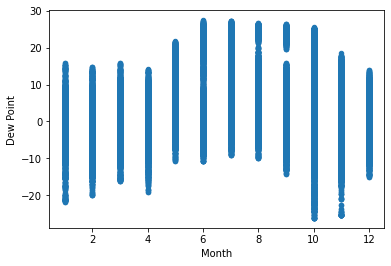

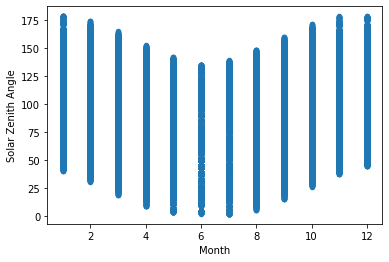

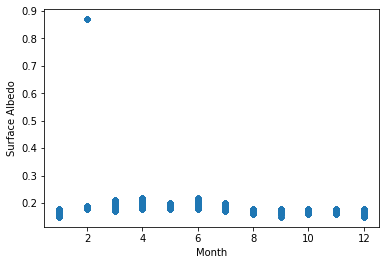

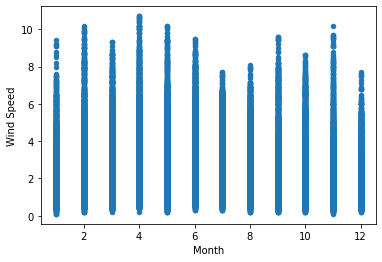

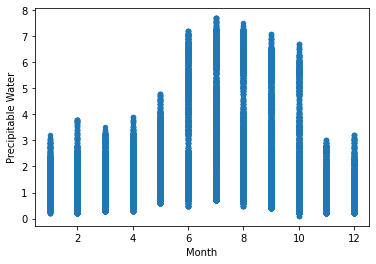

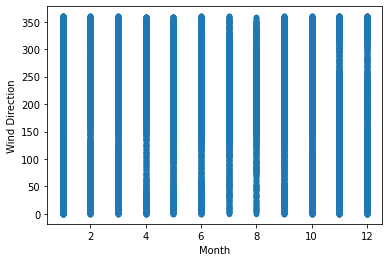

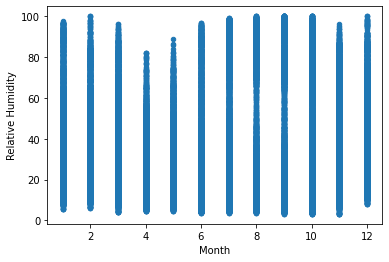

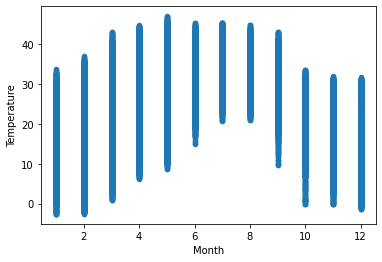

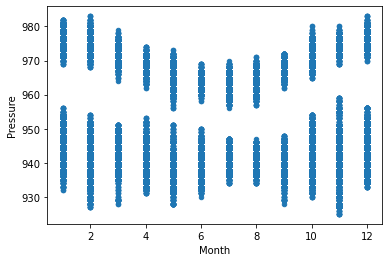

In [11]:
for feature in features:
    df.plot(kind='scatter', y=feature, x='Month')
    plt.show()

***from above analysis between months and features we canclude that
   1. between march and may GHI was at peak level then its get down fall
   2. wind speed was maximum in month of july and started increasing from April and down fall starts from august***

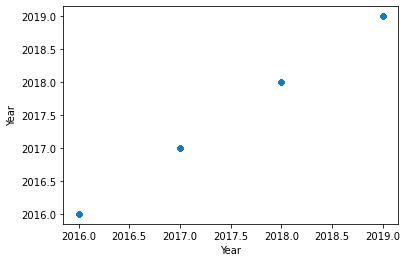

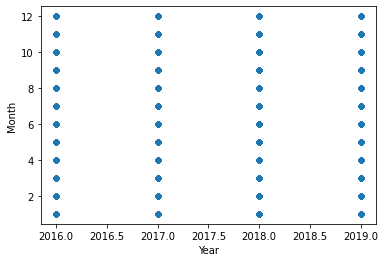

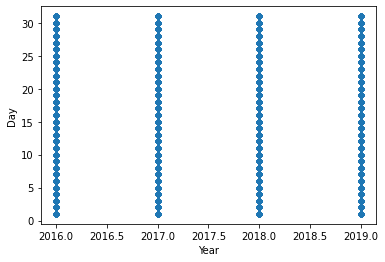

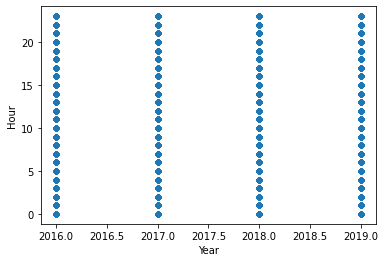

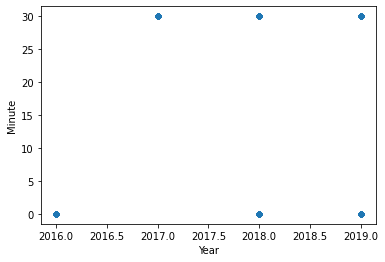

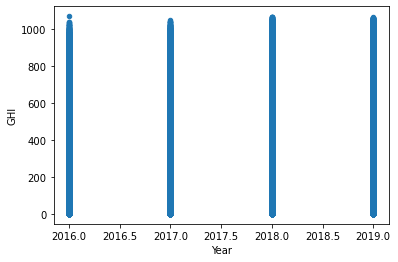

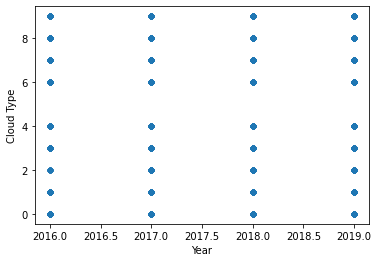

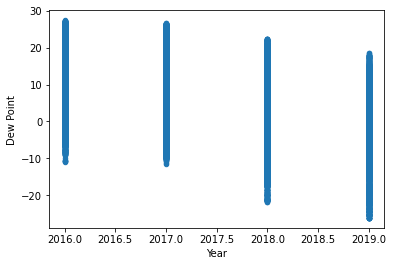

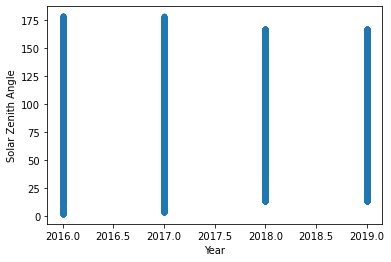

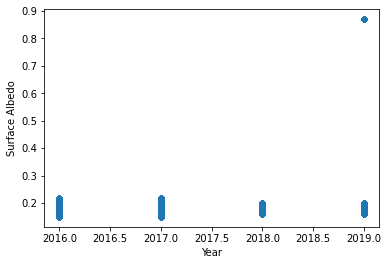

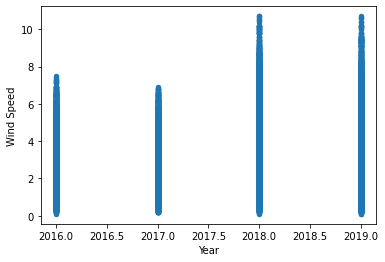

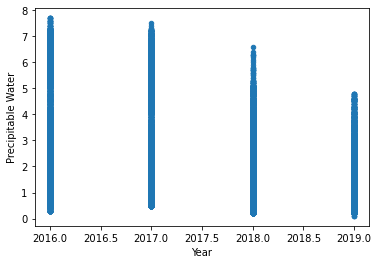

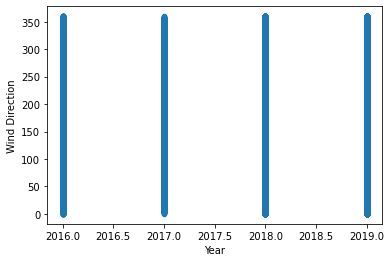

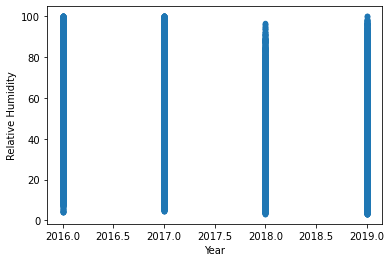

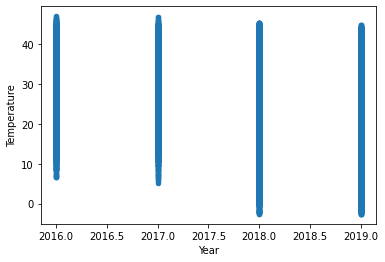

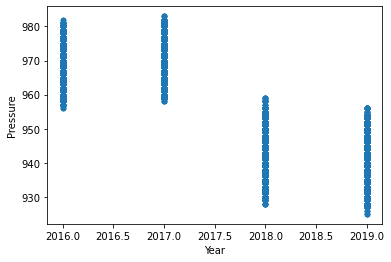

In [12]:
for feature in features:
    df.plot(kind='scatter', y=feature, x='Year')
    plt.show()

It is found that surface_albedo is maximum in year 2018

so far analysis can conclude droping DHI, CLearsky DHI,DNI, CLearsky DNI columns

In [13]:
df.corr()['GHI']

Year                  0.006134
Month                -0.040342
Day                   0.006559
Hour                 -0.005058
Minute               -0.001719
GHI                   1.000000
Cloud Type           -0.133795
Dew Point            -0.020667
Solar Zenith Angle   -0.840641
Surface Albedo        0.026738
Wind Speed            0.384547
Precipitable Water    0.004510
Wind Direction       -0.092569
Relative Humidity    -0.381135
Temperature           0.521224
Pressure             -0.029899
Name: GHI, dtype: float64

In [14]:
df.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
GHI                     int64
Cloud Type              int64
Dew Point             float64
Solar Zenith Angle    float64
Surface Albedo        float64
Wind Speed            float64
Precipitable Water    float64
Wind Direction          int64
Relative Humidity     float64
Temperature           float64
Pressure                int64
dtype: object

In [15]:
features = df.columns
features

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')

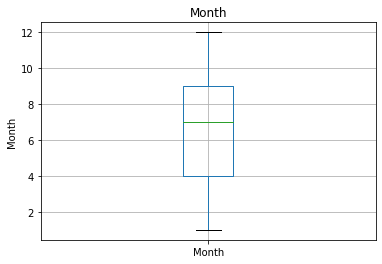

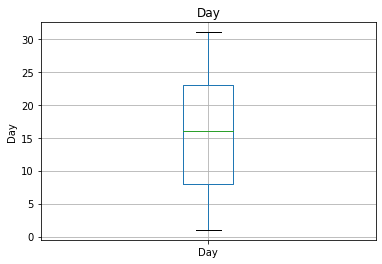

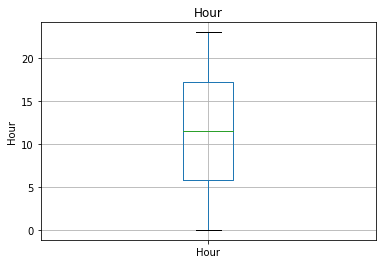

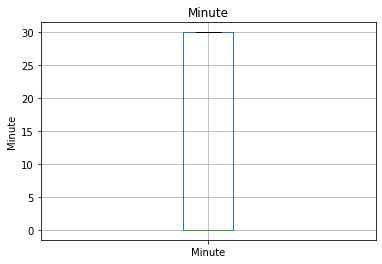

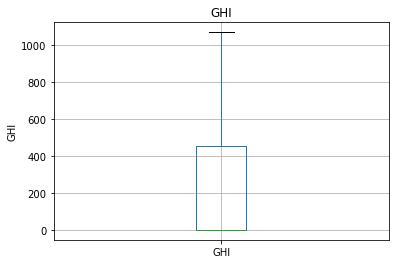

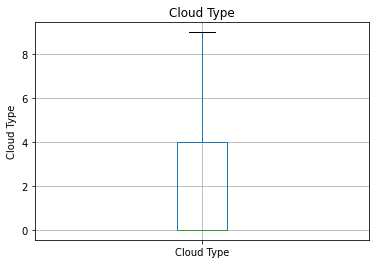

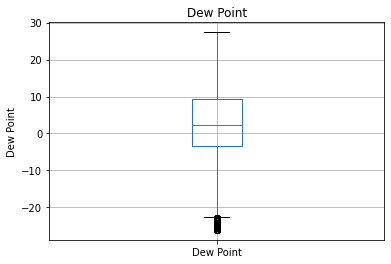

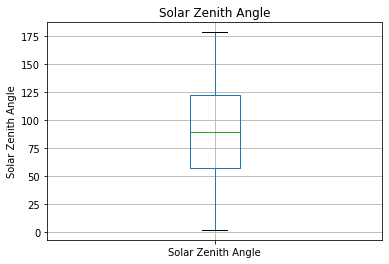

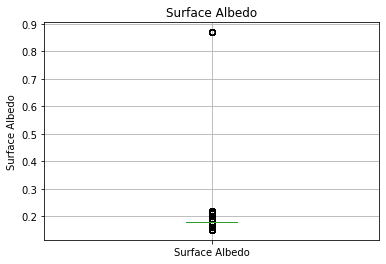

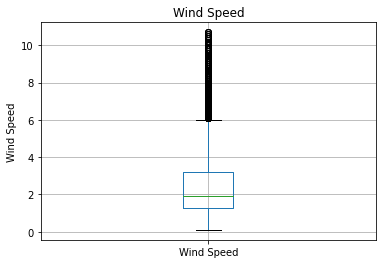

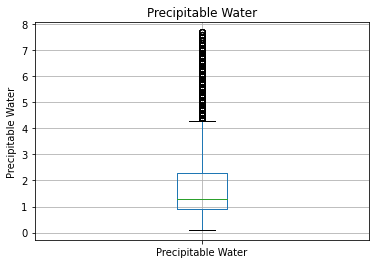

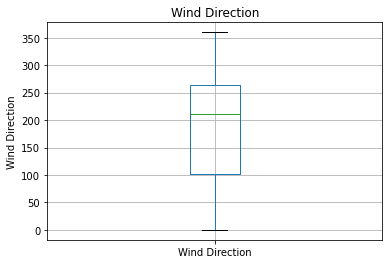

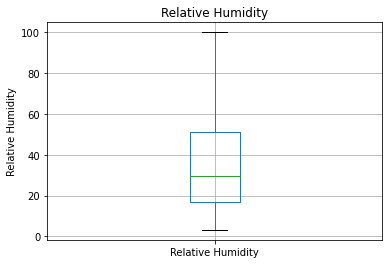

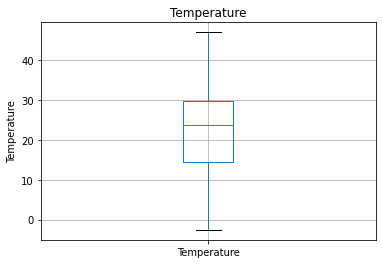

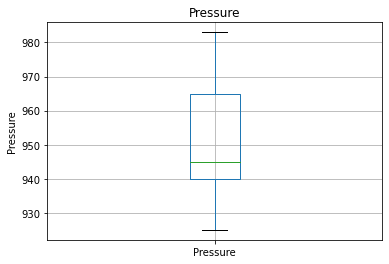

In [16]:
for i in range(1,len(features)):
    data=df.copy()
#     data[feature]=np.log(data[feature])
    data.boxplot(column=features[i],grid = True)
    plt.ylabel(features[i])
    plt.title(features[i])
    plt.show()

In [17]:
df.corr()['GHI']

Year                  0.006134
Month                -0.040342
Day                   0.006559
Hour                 -0.005058
Minute               -0.001719
GHI                   1.000000
Cloud Type           -0.133795
Dew Point            -0.020667
Solar Zenith Angle   -0.840641
Surface Albedo        0.026738
Wind Speed            0.384547
Precipitable Water    0.004510
Wind Direction       -0.092569
Relative Humidity    -0.381135
Temperature           0.521224
Pressure             -0.029899
Name: GHI, dtype: float64

In [18]:
x = df.drop(['GHI'],axis =1)
y = df['GHI']

## <u>Model Creation</u>

In [19]:
# if not installed pycaret
# import sys
# !{sys.executable} -m pip install numpy
# !pip install pycaret

# Auto Pycaret

In [20]:
import pycaret
from pycaret.regression import *
reg = setup(data=df, target='GHI',remove_outliers=True,feature_selection_threshold=0.2, silent=True, feature_selection=True, transformation=False, train_size=0.8)

,Description,Value
0,session_id,4756
1,Target,GHI
2,Original Data,"(52440, 16)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(39854, 12)"


In [21]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,31.3754,4759.8753,68.9365,0.9525,0.9896,0.4399,1.8980
lightgbm,Light Gradient Boosting Machine,31.3688,4929.3836,70.1678,0.9508,0.5935,0.4645,0.1580
et,Extra Trees Regressor,32.0617,5386.9096,73.3528,0.9463,0.3382,0.4563,2.4020
rf,Random Forest Regressor,32.9738,5593.5816,74.7474,0.9442,0.3429,0.4679,5.2220
knn,K Neighbors Regressor,34.3278,5815.3466,76.2225,0.9420,0.6369,0.5145,0.1030
gbr,Gradient Boosting Regressor,35.8371,6072.2451,77.8865,0.9394,0.9284,0.5098,2.3850
dt,Decision Tree Regressor,41.5147,11268.0396,106.0468,0.8876,0.4754,0.5109,0.0850
ada,AdaBoost Regressor,58.2527,11447.7398,106.8874,0.8858,0.7401,0.6099,0.3630
lr,Linear Regression,130.5178,24793.2777,157.4502,0.7527,3.2265,1.9035,0.4410
ridge,Ridge Regression,130.5178,24793.2791,157.4502,0.7527,3.2265,1.9035,0.0200


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4756, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)

# Train_Test_Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

# Model Fitting

In [24]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
Y_pred_lr = lr.predict(x_test)

In [55]:
from sklearn.metrics import r2_score
print('R2 Score For Logistic Regression:',round(r2_score(Y_pred_lr,y_test)*100,2))

R2 Score For Logistic Regression: 31.43


## K Nearest Neighbours

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
Y_pred_knn=knn.predict(x_test)

In [56]:
from sklearn.metrics import r2_score
print('R2 Score For K Nearest Neighbours :',round(r2_score(Y_pred_knn,y_test)*100,2))

R2 Score For K Nearest Neighbours : 48.92


## xgboost

In [30]:
# !pip install xgboost

In [33]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(verbosity=0) 
xgb_model.fit(x_train, y_train)

Y_pred_xgb = xgb_model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score
print('R2 Score For xgboost Regressor :',round(r2_score(Y_pred_xgb,y_test)*100,2))

R2 Score For xgboost Regressor : 94.93


In [83]:
Y_pred_x = xgb_model.predict(x_train)
print('R2 Score For xgboost Regressor :',round(r2_score(Y_pred_x,y_train)*100,2))

R2 Score For xgboost Regressor : 97.91


In [ ]:
# Feeling that the model was overfitted because testing accuracy was arround 95% and training accuracy was 98% 

## Neural Networks

In [39]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [40]:
model = Sequential()
model.add(Dense(50, activation='relu',input_dim=15))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [113]:
model.compile(optimizer='RMSProp', loss='mean_squared_error')

In [126]:
model.fit(x_train,y_train,epochs=200)

Epoch 1/10
36708/36708 [==============================] - 1s 33us/step - loss: 7066.3303
Epoch 2/10
36708/36708 [==============================] - 1s 33us/step - loss: 7068.4655
Epoch 3/10
36708/36708 [==============================] - 1s 34us/step - loss: 7074.7133
Epoch 4/10
36708/36708 [==============================] - 1s 32us/step - loss: 7047.9291
Epoch 5/10
36708/36708 [==============================] - 1s 32us/step - loss: 7038.6248
Epoch 6/10
36708/36708 [==============================] - 1s 32us/step - loss: 7045.9738 1s - los
Epoch 7/10
36708/36708 [==============================] - 1s 32us/step - loss: 7063.0036
Epoch 8/10
36708/36708 [==============================] - 1s 33us/step - loss: 7122.5611
Epoch 9/10
36708/36708 [==============================] - 1s 33us/step - loss: 7069.4434
Epoch 10/10
36708/36708 [==============================] - 1s 33us/step - loss: 7106.5409


In [127]:
Y_pred_nn = model.predict(x_test)

In [131]:
from sklearn.metrics import r2_score
print('R2 Score For Neural Networks :',round(r2_score(Y_pred_nn,y_test)*100,2))

R2 Score For Neural Networks : 93.04


In [132]:
Y_pred_n = model.predict(x_train)

In [133]:
from sklearn.metrics import r2_score
print('R2 Score For Neural Networks :',round(r2_score(Y_pred_n,y_train)*100,2))

R2 Score For Neural Networks : 92.93


<b>finally I found Neural Networks was performing well from my conclusion with out any overfitting Problem</b>

# Testing the Model

In [100]:
x_test[:10]

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
19100,2018,2,3,10,0,0,0.7,59.07,0.18,4.4,0.8,21,26.72,20.5,949
32329,2018,11,6,0,30,0,-2.3,155.09,0.17,0.8,1.2,290,28.42,16.0,939
31744,2018,10,24,20,0,0,4.5,128.19,0.18,1.3,1.5,227,37.71,19.3,943
31244,2018,10,14,10,0,0,-9.6,48.90,0.18,6.4,0.5,23,11.89,21.1,944
24115,2018,5,18,21,30,0,-0.1,116.53,0.18,1.8,1.6,266,21.58,23.0,937
23460,2018,5,5,6,0,0,-0.8,75.90,0.18,2.1,1.0,16,21.67,22.1,946
17717,2018,1,5,14,30,0,1.3,70.26,0.17,0.8,1.4,76,28.35,20.2,947
20898,2018,3,12,21,0,7,5.2,128.65,0.18,0.8,1.4,222,48.84,16.0,944
10126,2017,2,25,22,30,0,-5.2,154.34,0.18,1.2,0.7,73,16.48,21.3,975
42922,2019,6,14,17,0,4,5.2,68.55,0.19,2.7,2.1,287,15.36,35.4,935


In [110]:
k = model.predict(x_test[:10])
k

array([[4.4588934e+02],
       [1.8728971e-03],
       [2.6099086e-02],
       [6.7847260e+02],
       [3.2169461e-02],
       [1.5924124e+02],
       [2.2178746e+02],
       [3.9060235e-02],
       [8.0050230e-03],
       [2.4489275e+02]], dtype=float32)

In [102]:
y_test[:10]

19100    553
32329      0
31744      0
31244    499
24115      0
23460    133
17717    348
20898      0
10126      0
42922    145
Name: GHI, dtype: int64

In [111]:
df1 = pd.DataFrame(k,columns=['predicted_values'])

In [112]:
df1

,predicted_values
0,445.889343
1,0.001873
2,0.026099
3,678.472595
4,0.032169
5,159.241241
6,221.787460
7,0.039060
8,0.008005
9,244.892746


here we can see that predited values are acceptable and model that we created also Generalised model with good training 
and testing accuracies with out overfitting

In [137]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D

In [135]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [139]:
from keras.initializers import RandomNormal
model_relu_ADAM_BN_drop = Sequential()

model_relu_ADAM_BN_drop.add(Dense(128, activation='relu', input_dim=15, kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu_ADAM_BN_drop.add(BatchNormalization())
model_relu_ADAM_BN_drop.add(Dropout(0.3))

model_relu_ADAM_BN_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu_ADAM_BN_drop.add(BatchNormalization())
model_relu_ADAM_BN_drop.add(Dropout(0.3))

model_relu_ADAM_BN_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu_ADAM_BN_drop.add(BatchNormalization())
model_relu_ADAM_BN_drop.add(Dropout(0.3))

model_relu_ADAM_BN_drop.add(Dense(1))

print(model_relu_ADAM_BN_drop.summary())

model_relu_ADAM_BN_drop.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               2048      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)               

In [140]:
history = model_relu_ADAM_BN_drop.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test))

Train on 36708 samples, validate on 15732 samples
Epoch 1/100
36708/36708 [==============================] - 2s 47us/step - loss: 140554.9190 - val_loss: 85053.3365
Epoch 2/100
36708/36708 [==============================] - 1s 31us/step - loss: 107469.4171 - val_loss: 172518.1248
Epoch 3/100
36708/36708 [==============================] - 1s 31us/step - loss: 69771.4744 - val_loss: 163775.1606
Epoch 4/100
36708/36708 [==============================] - 1s 30us/step - loss: 38766.4903 - val_loss: 144468.5523
Epoch 5/100
36708/36708 [==============================] - 1s 31us/step - loss: 20904.6746 - val_loss: 154655.6420
Epoch 6/100
36708/36708 [==============================] - 1s 32us/step - loss: 13813.5546 - val_loss: 111137.4481
Epoch 7/100
36708/36708 [==============================] - 1s 31us/step - loss: 11471.0585 - val_loss: 93052.4817
Epoch 8/100
36708/36708 [==============================] - 1s 34us/step - loss: 10839.8898 - val_loss: 9022.1286
Epoch 9/100
36708/36708 [=======

Epoch 72/100
36708/36708 [==============================] - 1s 32us/step - loss: 9960.5000 - val_loss: 9040.5165
Epoch 73/100
36708/36708 [==============================] - 1s 33us/step - loss: 9845.6454 - val_loss: 8392.5814
Epoch 74/100
36708/36708 [==============================] - 1s 32us/step - loss: 9920.1875 - val_loss: 11497.7114
Epoch 75/100
36708/36708 [==============================] - 1s 32us/step - loss: 9970.7385 - val_loss: 7089.0640
Epoch 76/100
36708/36708 [==============================] - 1s 33us/step - loss: 9940.9675 - val_loss: 10657.8146
Epoch 77/100
36708/36708 [==============================] - 1s 32us/step - loss: 10033.9469 - val_loss: 11537.4031
Epoch 78/100
36708/36708 [==============================] - 1s 32us/step - loss: 9765.8925 - val_loss: 7570.2405
Epoch 79/100
36708/36708 [==============================] - 1s 32us/step - loss: 9861.8159 - val_loss: 11917.3502
Epoch 80/100
36708/36708 [==============================] - 1s 32us/step - loss: 9961.3331 

In [159]:
Y_pred_rab = model_relu_ADAM_BN_drop.predict(x_test)

In [150]:
from sklearn.metrics import r2_score
print('R2 Score For Neural Networks :',round(r2_score(Y_pred_rab,y_test)*100,2))

R2 Score For Neural Networks : 91.44


In [160]:
Y_pred_r =  model_relu_ADAM_BN_drop.predict(x_train)
Y_pred_rab[:10]

array([[518.60693 ],
       [ 16.372728],
       [ 16.32167 ],
       [695.6779  ],
       [ 15.878792],
       [247.35388 ],
       [300.54178 ],
       [ 15.78334 ],
       [ 16.14471 ],
       [312.03232 ]], dtype=float32)

In [155]:
from sklearn.metrics import r2_score
print('R2 Score For Neural Networks :',round(r2_score(Y_pred_r,y_train)*100,2))

R2 Score For Neural Networks : 91.17


In [161]:
y_test[:10]

19100    553
32329      0
31744      0
31244    499
24115      0
23460    133
17717    348
20898      0
10126      0
42922    145
Name: GHI, dtype: int64

# here we can see that the prediction were some how in accurate so we can't consider this model out of which Neural Networks performed well

## 26/04/2021 work

In [ ]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/combined_data_from_2016_2019_with_extra_features.csv')

In [ ]:
df.head(n=200)

In [ ]:
df.corr()

In [ ]:
df = df.drop(['Clearsky GHI','DHI','Clearsky DHI','DNI','Clearsky DNI'],axis =1)

In [ ]:
df.head()

In [ ]:
print(df.corr()["GHI"].abs().sort_values(ascending=False))

In [ ]:
df = df.drop(['Ozone','Fill Flag'],axis = 1)

In [ ]:
print(df.corr()["GHI"].abs().sort_values(ascending=True))

In [ ]:
df.info()

In [ ]:
print(np.percentile(df.Dew_Point,[99])[0])
print(np.percentile(df.Dew_Point,[100])[0])

In [ ]:
print(np.percentile(df.Solar_Zenith_Angle,[0])[0])
print(np.percentile(df.Solar_Zenith_Angle,[3])[0])

In [ ]:
features = df.columns
features

In [ ]:
# Linear analysis
for feature in features:
    data=df.copy()
    plt.scatter(data[feature],data['GHI'])
    plt.xlabel(feature)
    plt.ylabel('GHI')
    plt.title(feature)
    plt.show()
        

In [ ]:
## We will be using logarithmic transformation to extract more relavent information from the data


for feature in features:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['GHI']=np.log(data['GHI'])
    plt.scatter(data[feature],data['GHI'])
    plt.xlabel(feature)
    plt.ylabel('GHI')
    plt.title(feature)
    plt.show()

In [ ]:
for feature in features:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature,grid = True)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## found many Outliers from Temp,Dew_poin, Solar_zenith_angle, Surface_albedo Columns

In [ ]:
from pycaret.regression import *
reg = setup(data=df, target='GHI',remove_outliers=True, normalize=True, silent=True,train_size=0.8)